In [63]:
#### 导入依赖包
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import random

### 选择点数（最高点数为18，大约需要10s求解）
n = 18

### 生成点坐标[0,100]之间的实数
np.random.seed(5)
x = np.random.rand(n)*100
y = np.random.rand(n)*100

### 计算距离矩阵
dist = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        dist[i][j] = math.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)

In [64]:
### 动态规划求解
inf=1e9
m=1<<(n-1)

### dp数组为节点n，到达状态s时的最短距离
dp=np.zeros((n,m))

### 初始化dp数组(假设从0起始，节点0已经访问过，状态空间不用记录)
for i in range(n):
    dp[i][0]=dist[i][0]

for j in range(1,m):
    for i in range(n):
        dp[i][j]=inf
        # 如果节点i已经在状态j中，跳过
        if i>0 and (j>>(i-1))&1==1:
            continue
        # 循环遍历状态j中的节点k，找到状态j已经访问的点
        for k in range(1,n):
            if (j>>(k-1))&1==0:
                continue
            dp[i][j]=min(dp[i][j],dp[k][j^(1<<(k-1))]+dist[k][i])


### 从dp数组中找到最短路径
path=[]
visited=[0]*n

# 判断是否全部访问过
def is_all_visited(visited):
    for i in range(len(visited)):
        if visited[i]==0:
            return False
    return True

# 前驱节点定义与一些其他定义
pioneer=0;min_dist=inf;state=m-1
visited[pioneer]=1
path.append(pioneer)

while(not is_all_visited(visited)):
    # temp记录当前状态下的前驱最小值
    temp=0
    min_dist=inf
    for i in range(1,n):
        if visited[i]==0 and state&(1<<(i-1))!=0 :
            # 寻找当前状态下的前驱最小值
            if dp[i][state^(1<<(i-1))]+dist[i][pioneer]<min_dist:
                min_dist=dp[i][state^(1<<(i-1))]+dist[i][pioneer]
                temp=i
    ## 更新前驱节点，状态，路径
    pioneer=temp
    visited[pioneer]=1
    path.append(pioneer)
    state=state^(1<<(pioneer-1))

In [65]:
print('最短路径长度为：',dp[0][m-1])
print('最短路径为：',end='')
for i in range(len(path)):
    print(path[i],end='->')
print(0)

最短路径长度为： 345.07202238501446
最短路径为：0->2->17->13->8->16->12->7->4->5->11->6->3->1->14->9->10->15->0


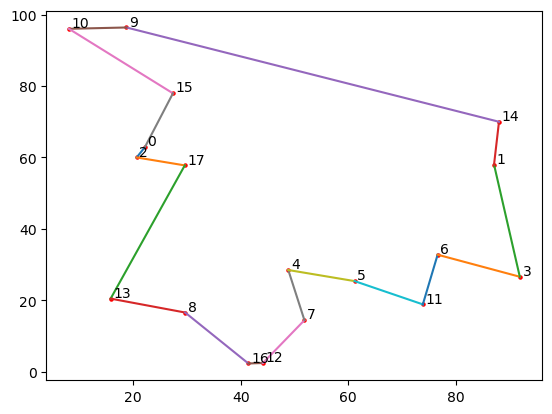

In [66]:
### 将x,y坐标绘制在坐标轴上,并且将编号标注在点旁边
for i in range(n):
    plt.annotate(i, xy=(x[i], y[i]), xytext=(x[i]+0.5, y[i]+0.5))
plt.scatter(x, y, c='r', s=5)
### 绘制路径连线
for i in range(len(path)-1):
    plt.plot([x[path[i]], x[path[i+1]]], [y[path[i]], y[path[i+1]]])
plt.plot([x[path[0]], x[path[len(path)-1]]], [y[0], y[path[len(path)-1]]])
### 显示坐标轴
plt.axis('on')
plt.show()